# Data Analysis on HEART HEALTH

In [1]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Loading the data set


In [2]:
def load_dataset(file_path):
  return pd.read_csv(file_path)


df = load_dataset("./Health_heart_experimental.csv")


## Line graph for age vs DiaBP

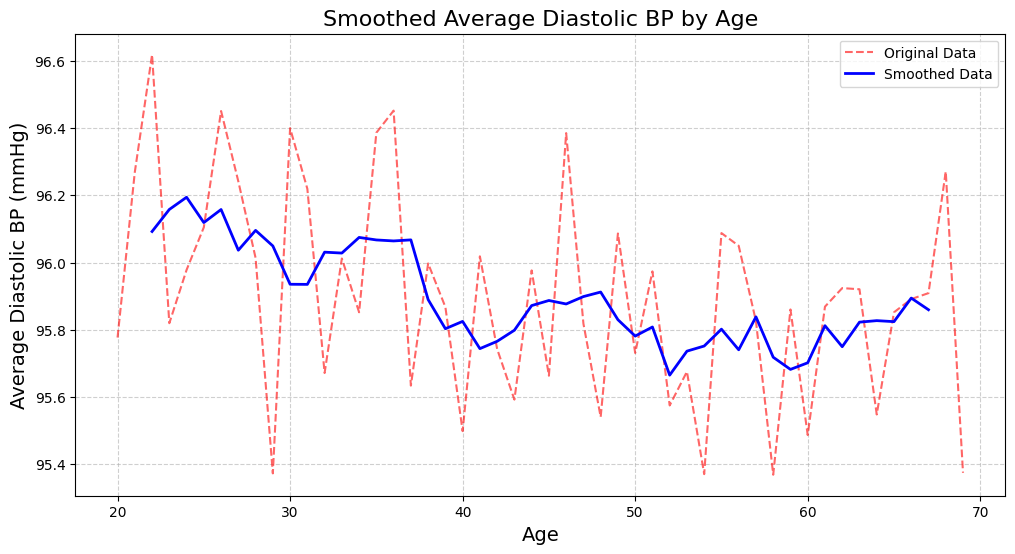

In [3]:
#grouping by age ( large amount of data)

age_bp_avg = df.groupby('age')['DiaBP'].mean().reset_index()

#Smoothing the data 

age_bp_avg['Smoothed_DiaBP'] = age_bp_avg['DiaBP'].rolling(window=5, center=True).mean()

# Ploting the original and smoothed data

plt.figure(figsize=(12, 6))
plt.plot(age_bp_avg['age'], age_bp_avg['DiaBP'], label="Original Data", color="red", linestyle="--", alpha=0.6)
plt.plot(age_bp_avg['age'], age_bp_avg['Smoothed_DiaBP'], label="Smoothed Data", color="blue",linewidth=2)

# Adding the titles and labels

plt.title("Smoothed Average Diastolic BP by Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Average Diastolic BP (mmHg)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


The raw data showed significant irregularity between the average Diastotic BP patient and their age groups due to excess noise. Hence, the data was smoothened to remove the noise highlight the general pattern in diastotic BP as the age increases. The smoothened data shows a general decline in diastotic BP from age 20 to around 50. After the age 50, the smoothed trend appears to stabilize.

## Bar graph 



indication  sex
0           0      18841
            1      18963
1           0      17105
            1      16851
dtype: int64


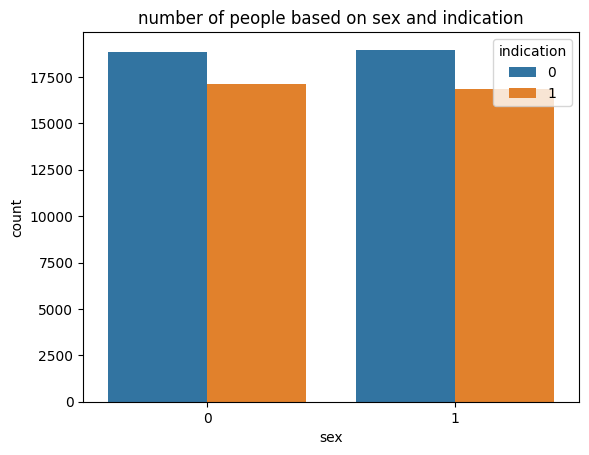

In [4]:
#ploting bar graph 

sns.countplot(data=df, x='sex', hue='indication')

#displaing the count

indication_sex_counts = df.groupby(['indication', 'sex']).size()
print(indication_sex_counts)
plt.title('number of people based on sex and indication')
plt.show()

The bar graph above shows the variation of indication of heart problems between the men and women population. Here, the men poulation is depicted as "1" and women as "0", with the indication of "1" representing individuals with diastotic BP and "0" being the opposite. The graph shows that men are slightly more subjected to the problem than women.

## Pie Chart

bmi_category
Higher than Good BMI    51281
Good BMI                14548
Less than Good BMI       5931
Name: count, dtype: int64


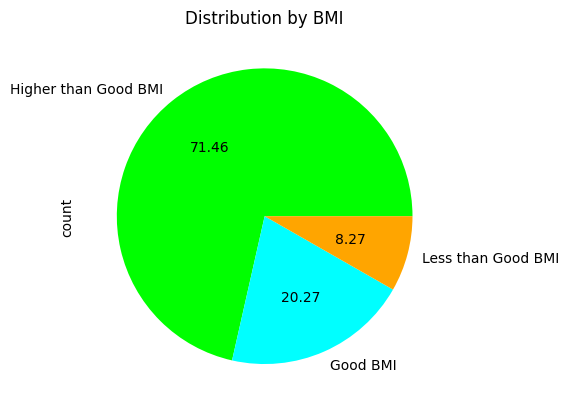

In [5]:
#Category of bmi

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Less than Good BMI'
    elif 18.5 <= bmi <= 24.9:
        return 'Good BMI'
    else:
        return 'Higher than Good BMI'

df['bmi_category'] = df['BMI'].apply(bmi_category)

#plotting the pie chart

bmi_counts = df['bmi_category'].value_counts()
bmi_counts.plot(kind='pie', autopct='%0.2f', colors=['lime','cyan','orange'])

#displaing the number

print(bmi_counts)
plt.title('Distribution by BMI')
plt.show()

The Pie chart represents the distribution of Body-Mass Index(BMI) of the overall population of the patients. This chart shows that seventh-tenth of the entire population are overweight, due to having higher than good BMI, while only two-tenths are subjected within the good range and the remaining are below the average level. This chart shows that a significant reason behind the health issue is being overweight or obese. 

## Box Plot


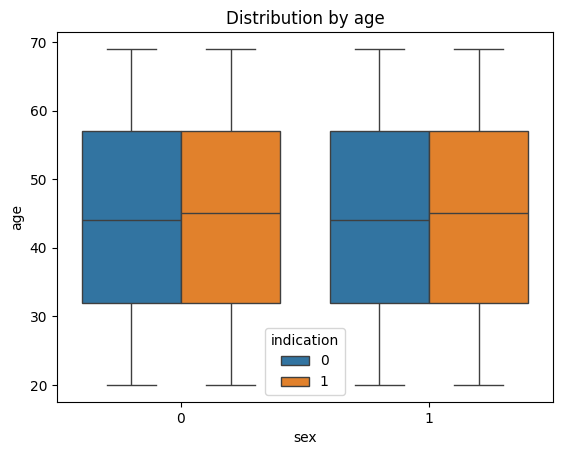

In [6]:
sns.boxplot(x='sex',y='age',hue='indication',data=df)
plt.title('Distribution by age')
plt.show()

The Box plot describes the variation of population among a specific age group. Observing the plot, it shows that the survey was taken among the patients of age group 30 - 60 years old. Since the median is slightly upper in indication(1) than indication(0), expresseing that elderly people are more prone to heart issues.

## Histogram

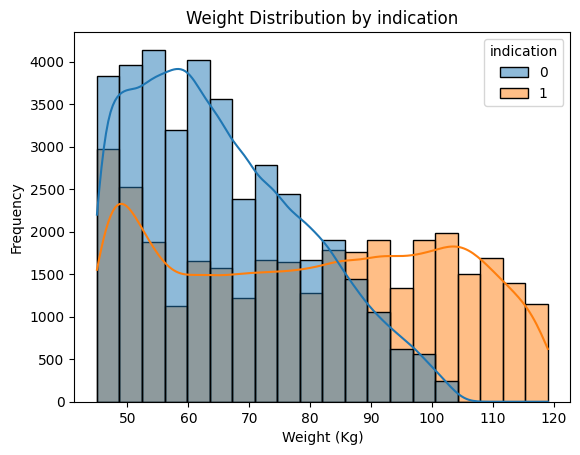

In [7]:
sns.histplot(data=df, x='weightKg', hue='indication', kde=True, bins=20)
plt.title('Weight Distribution by indication')
plt.xlabel('Weight (Kg)')
plt.ylabel('Frequency')
plt.show()


The histogram depicts the relationship between the weight distribution of the population and the frequency of the heart problems. This figure shows that the distribution for indication 0(People not affected by heart problems) is skewed towards the lower weights, while for indication 1 (people with heart problems) is shifted towards higher weight. This suggests a correlation between higher weight and the presence of heart problem indications. 

## Scatter plot

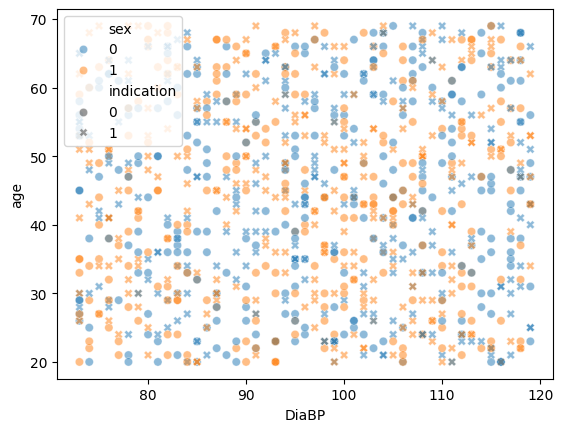

In [14]:
df_sample = df.sample(n=1000, random_state=42)
sns.scatterplot(x='DiaBP', y='age',hue='sex', style='indication',data=df_sample,alpha=0.5)
plt.show()

The scatter plot visualizes the relationship between age and diastolic blood pressure (DiaBP) across two categorical variables: sex (0 and 1) and indication (0 and 1). Points are differentiated by color for sex and by marker style for indication. A clear variation between the Diastotic BP patients and the age groups was not found. This might have happened due to irregular dataset and nonlinear variation between the factors. 

# CONCLUSION


The survey provides a detailed explanation on the relationship between various factors relating to Diastotic Blood Pressure patients in a hospital between the age groups 30 to 60 years old. This survey dives into the trends of the frequency of the diastotic BP patients and the correlating causes and their frequencies, which would help medical specialists study about ways of curing such problems. 

The study shows that some of the main reason in the upsurge of the heart problems in the population is due to obesity and old age, while it is still unclear if age and gender of patients have any correlation to being a factor for rise in frequency of diastotic BP. This study further suggests that there is more areas to explore and factors such as age and gender needs to be researched deeply. With a better approach, this survey may very well be the foundation to the approach towards cure for this disease. 